<a href="https://colab.research.google.com/github/IlliyyinAkbar2002/Classification-Perceptron-Algorithms/blob/main/Classification_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

In [11]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

1554915153439140493

In [12]:
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >= 0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)

In [13]:
perceptron = Perceptron(num_inputs=X_train.shape[1])

In [14]:
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost


In [15]:
learning_rate = 0.001

In [16]:
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight & bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

Epoch [1/10], weight:[[ 0.06388908 -0.26360053]], bias:[-0.17571677] Loss: -214.0000
Epoch [2/10], weight:[[ 0.06982087 -0.28005093]], bias:[-0.12471667] Loss: -51.0000
Epoch [3/10], weight:[[ 0.07012068 -0.2868415 ]], bias:[-0.09571661] Loss: -29.0000
Epoch [4/10], weight:[[ 0.06397947 -0.29056633]], bias:[-0.07971658] Loss: -16.0000
Epoch [5/10], weight:[[ 0.06149163 -0.29259592]], bias:[-0.06671655] Loss: -13.0000
Epoch [6/10], weight:[[ 0.05933319 -0.29385173]], bias:[-0.05671655] Loss: -10.0000
Epoch [7/10], weight:[[ 0.05831484 -0.29406887]], bias:[-0.05071656] Loss: -6.0000
Epoch [8/10], weight:[[ 0.0572965 -0.294286 ]], bias:[-0.04471657] Loss: -6.0000
Epoch [9/10], weight:[[ 0.0571768  -0.29415473]], bias:[-0.03971658] Loss: -5.0000
Epoch [10/10], weight:[[ 0.05719923 -0.29372215]], bias:[-0.03671659] Loss: -3.0000


In [17]:
pred = perceptron(X_test)

In [18]:
accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

Accuracy on Test Dataset: 0.9850000143051147


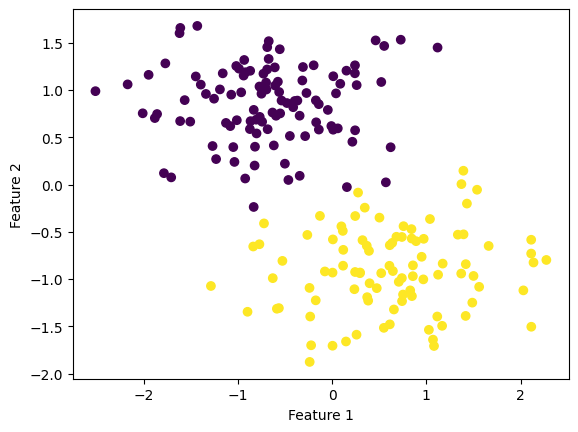

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()